In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the data

In [2]:
#reading the .csv file using pandas
df = pd.read_csv('./Dataset/train.csv')
print(df.shape)

(42000, 785)


In [3]:
#printing all the column names
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [6]:
#Splitting the dataset into X and Y
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [7]:
#printing all the classes present in the dataset
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Spliting into test and train data

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


### Visualising Data

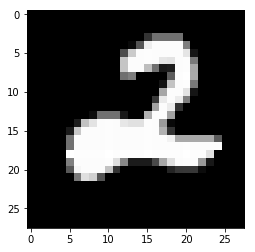

2


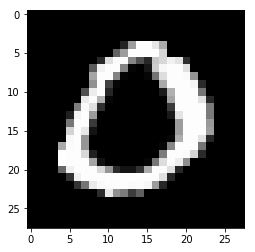

0


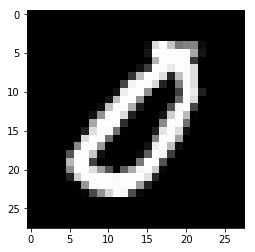

0


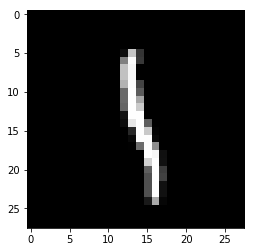

1


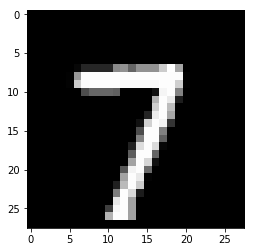

7


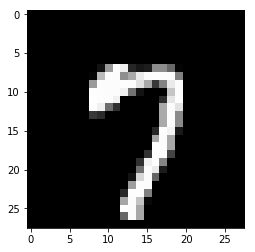

7


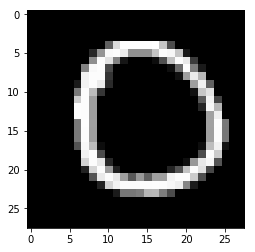

0


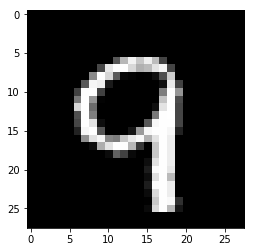

9


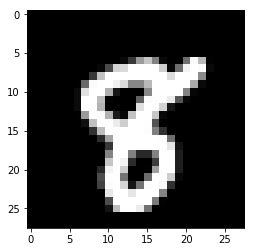

8


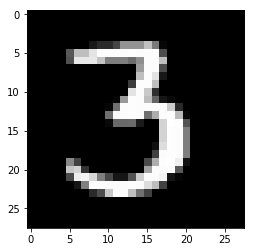

3


In [9]:
def drawImg(sample):
    '''
    draws the image for a given sample
    '''
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()  

#drawing first 10 images present in the dataset with their labels
for i in range(10):
    drawImg(X_train[i])
    print(Y_train[i])

## Creating our SVM classifier from scratch

In [10]:
class SVM:
    def __init__(self, c=1.0):
        self.c = c
        self.w = 0
        self.b = 0
    
    def loss(self, X, Y, w, b):
        c = self.c
        loss = 0
        for i in range(X.shape[0]):
            ti = Y[i]*(w@X[i] + b)
            loss += c*max(0,1-ti)
        loss += 0.5 * w.T@w
        return loss
            
    def fit(self, X, Y, batch_size = 100, learning_rate = 0.001, max_itr = 300):
        '''
        This function is used to train the classifier
        '''
        w = np.zeros((X.shape[1],))
        b = 0
        c = self.c
        n = learning_rate
        losses  = []
        
        indices = np.arange(X.shape[0])
        
        for i in range(max_itr):
            losses.append(self.loss(X,Y,w,b))
            np.random.shuffle(indices)
            
            #iterating each batch
            for batch_start in range(0,X.shape[0],batch_size):
                gradw = np.zeros(X.shape[1],)
                gradb = 0
                
                #iterating each example of a batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<X.shape[0]:
                        ix = indices[j]
                        ti = Y[ix]*(w@X[ix] + b)

                        if ti<1:
                            gradw += c*Y[ix]*X[ix]
                            gradb += c*Y[ix]
                        
                w = w - n*w + n*gradw
                b = b + n*gradb
                
                
        self.w = w
        self.b = b
        return w, b, losses

### Preparing data for one-vs-one classification

In [11]:
#CLASSES variable is assigned the number of classes present in the training data
CLASSES = len(np.unique(Y_train))

In [12]:
def getClassWiseData(x,y):
    '''
    This function returns a dictionary of class-wise data
    '''
    data = {}
    classes = np.unique(y)
    for i in classes:
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data
        

In [14]:
def getBinaryClassificationData(d1,d2):
    '''
    Modifies the data labels, and returns the data that can be used for binary classification
    '''
    l1 = d1.shape[0]
    l2 = d2.shape[0]
    no_of_features = d2.shape[1]
    
    x = np.zeros((l1+l2, no_of_features),dtype='uint8')
    y = np.zeros((l1+l2,))
    
    x[:l1,:] = d1
    x[l1:,:] = d2
    
    y[:l1] = -1
    y[l1:] = +1
        
    return x,y
    

### Training NC2 classifiers

In [17]:
def trainSVMs(x,y):
    '''
    This function trains NC2 SVM classifiers, one for each pair of classes.
    (N : number of classes present in the training data)
    '''
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getBinaryClassificationData(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00000000007,max_itr=100)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    
    return svm_classifiers

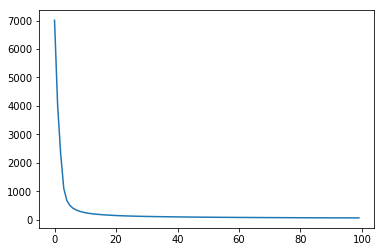

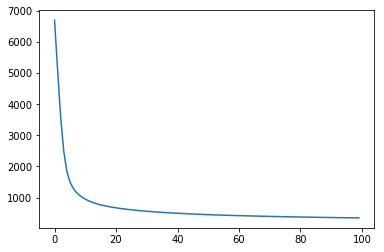

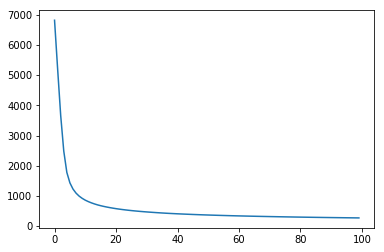

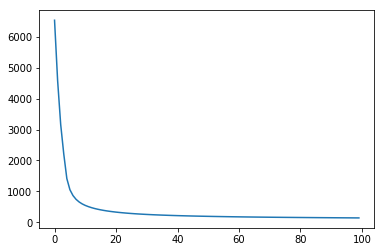

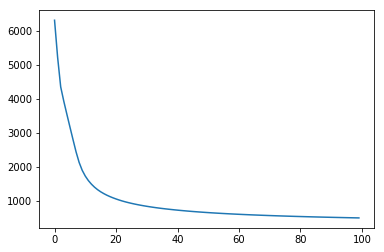

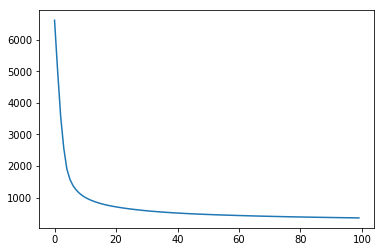

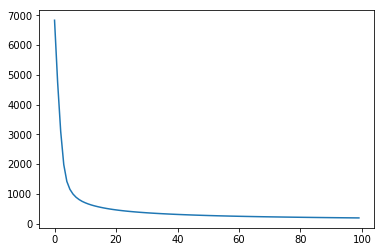

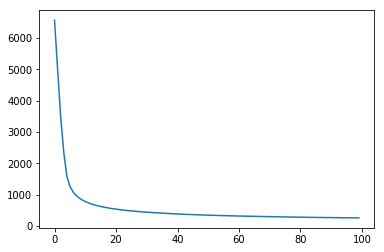

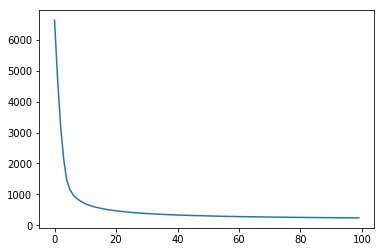

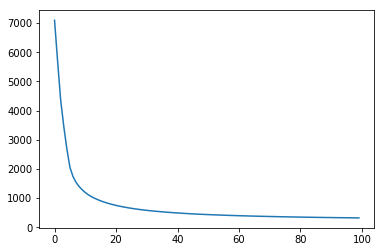

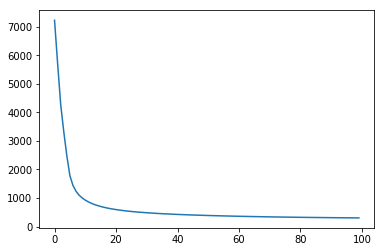

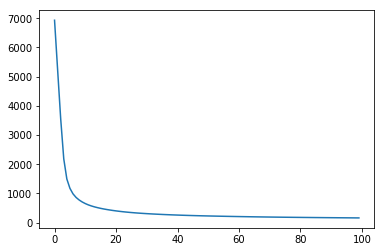

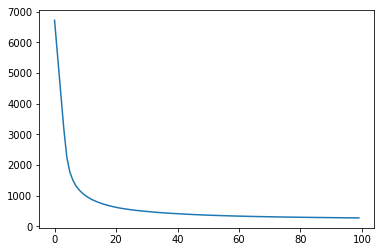

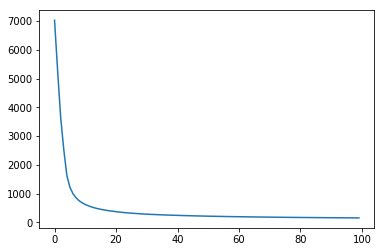

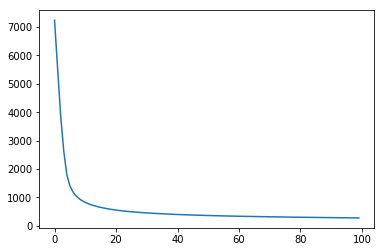

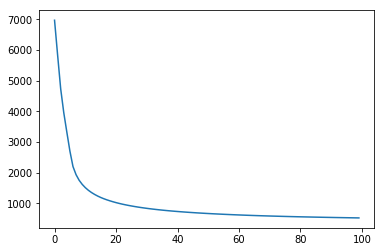

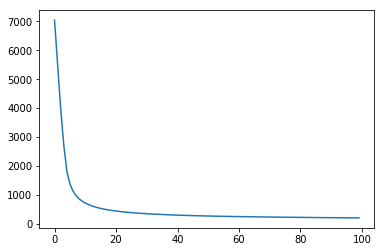

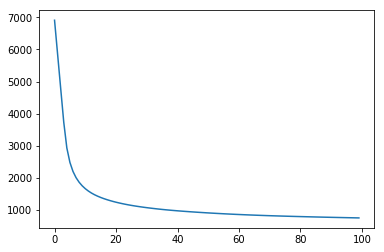

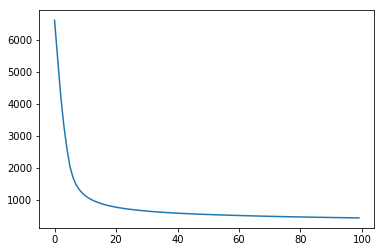

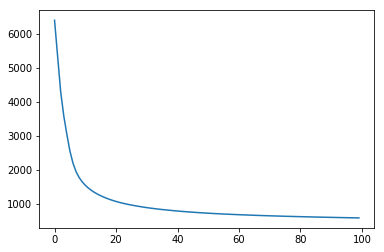

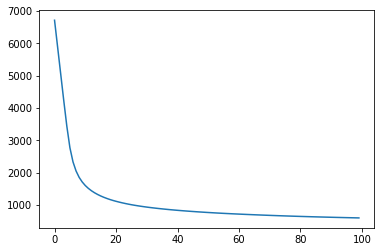

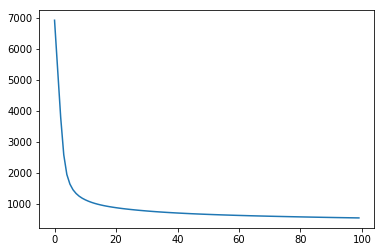

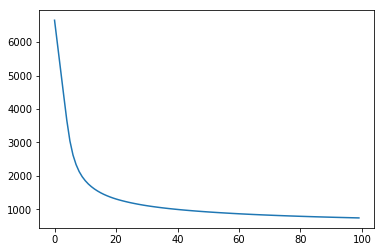

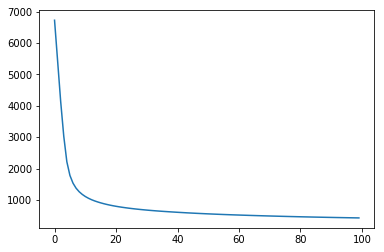

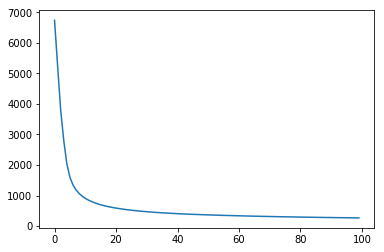

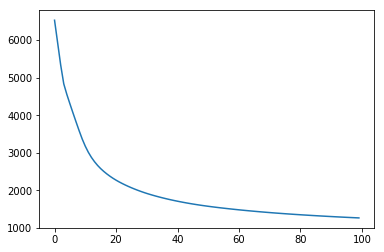

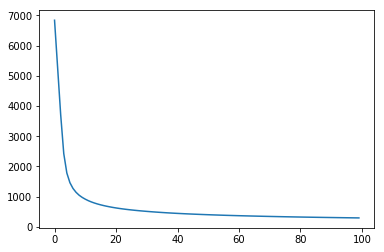

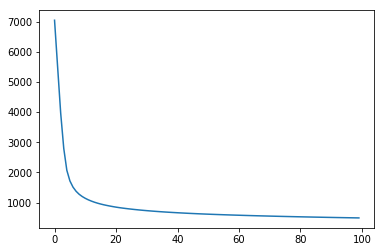

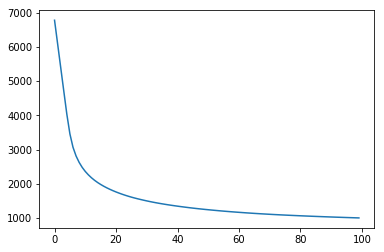

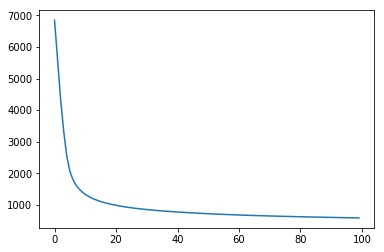

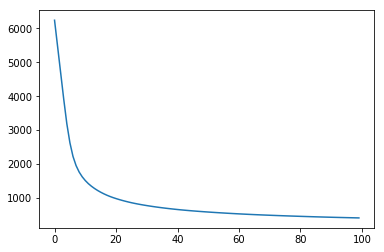

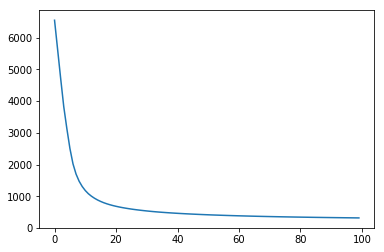

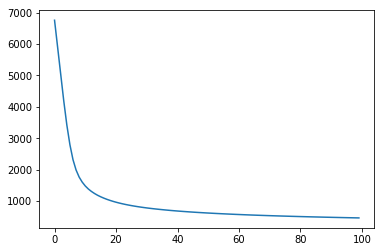

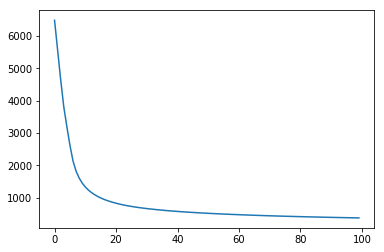

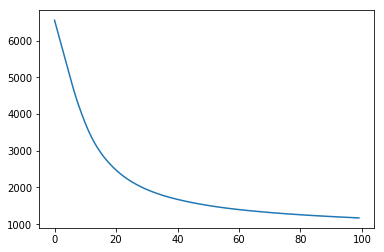

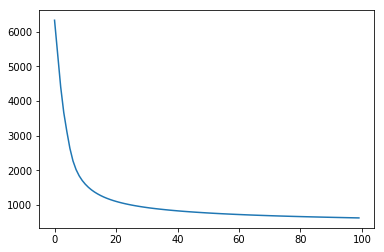

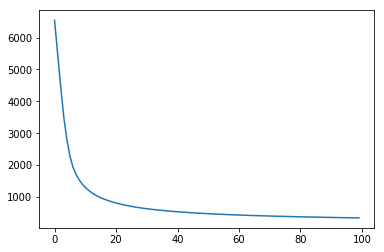

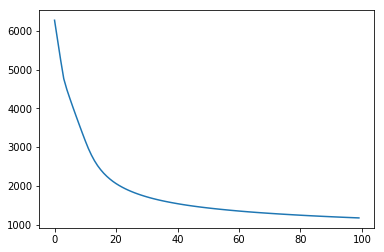

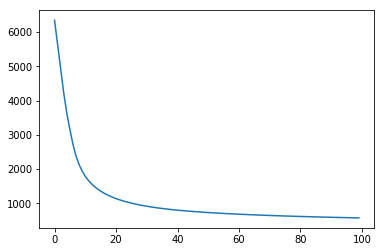

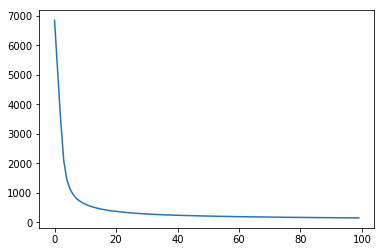

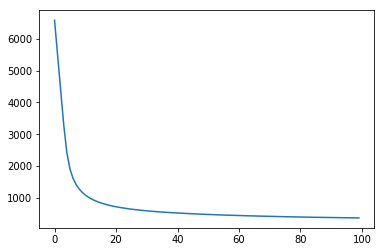

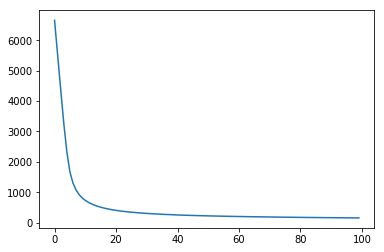

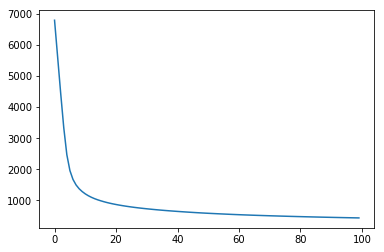

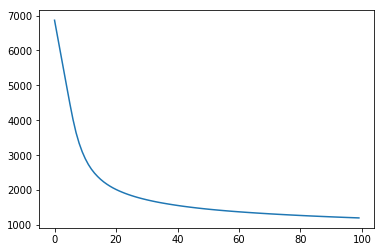

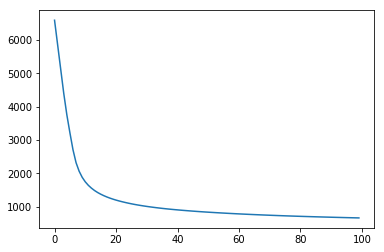

CPU times: user 4min 19s, sys: 205 ms, total: 4min 19s
Wall time: 4min 19s


In [18]:
%%time
#initializing an object of class SVM(creted by us), and c = 1.0
mySVM = SVM(c=1.0)
#training NC2 classifiers
svm_classifiers = trainSVMs(X_train,Y_train)

In [19]:
def binaryPredict(x,w,b):
    '''
    returns either +1 or -1, i.e., it makes a binary prediction 
    '''
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [20]:
def predict(x):
    '''
    calls binaryPredict function for each of the NC2 classifiers, 
    and then it does majority voting to make the final prediction.
    '''
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [21]:
print(predict(X_train[0]))
print(Y_train[0])

2
2


In [22]:
def accuracy(x,y):
    '''
    returns the accuracy of the classifiers for the given testing data
    '''
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [23]:
print('Training Accuracy : %.4f' %accuracy(X_train, Y_train))
print('Testing Accuracy : %.4f' %accuracy(X_test, Y_test))

Training Accuracy : 0.9116
Testing Accuracy : 0.9052
